In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import textwrap
from matplotlib import ticker

# AUROC values from the table
auroc_values = [0.8623, 0.8851, 0.8919, 0.8858, 0.876, 0.8845, 0.8919, 0.8793, 0.8101, 0.8506, 0.8474]

# Method labels with '+' moved to next line only when needed
methods = [
    'Undersampling',
    'Window overlap \n(ictal samples only)',
    'Window overlap \n(all samples)',
    'Window overlap \n(all samples) \n+ undersampling',
    'Positive class weight',
    'Window overlap \n(ictal samples only) \n+ positive class weight',
    'Window overlap \n(all samples) \n+ positive class weight',
    'Window overlap \n(all samples) + SMOTE \n(training set and LOO patient)',
    'Window overlap \n(all samples) \n+ SMOTE (training set)',
    'Window overlap \n(all samples) \n+ SMOTE (LOO patient)',
    'Window overlap \n(all samples) \n+ SMOTE (LOO patient) \n+ positive class weight'
]

# Text wrap values for each label (index corresponds to the method labels)
wrap_values = [
    15, 40, 35, 35, 18, 70, 70, 70, 70, 70, 80
]

# Function to wrap text and add '+' sign when necessary
def wrap_text_with_plus(text, width):
    wrapped_text = ""
    words = text.split(' ')
    line = ""
    for word in words:
        if line == "":
            line = word
        elif line.endswith('+'):
            line += ' ' + word
        else:
            if len(line + word) <= width:
                line += ' ' + word
            else:
                wrapped_text += line + '\n'
                line = word
    wrapped_text += line
    return wrapped_text

# Set the figure size (A4 size: 8.27x11.69 inches)
plt.figure(figsize=(12, 4))  # Width is 12 inches, height is adjusted to fit the plot

# Plot the bar chart
bar_colors = [(0.2, 0.4, 0.8) if auroc != max(auroc_values) else 'green' for auroc in auroc_values]
bars = plt.bar(range(len(methods)), auroc_values, color=bar_colors)

# Set the y-axis limits
plt.ylim(0.8, max(auroc_values) + 0.02)

# Set the best result label in the legend
#plt.legend(['Best AUROC'], loc='upper right')

# Wrap the x-axis labels after handling the '+' signs with custom wrap values
wrapped_labels = [wrap_text_with_plus(label, wrap_values[i]) for i, label in enumerate(methods)]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(range(len(methods)), wrapped_labels, rotation=45, fontsize=8)

# Alternating tick placement (first label at the bottom, second at the top, and so on)
plt.gca().tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)

formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.2f}".lstrip('0'))
plt.gca().yaxis.set_major_formatter(formatter)

# Set axis labels and title
#plt.xlabel('Method', fontsize=10)
plt.ylabel('AUROC', fontsize=10)
#plt.title('Performance of the model using different class imbalance handling methods', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('auroc_bar_plot.pdf', format='pdf',dpi=400)  # Save the plot to a PDF file
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import textwrap
import matplotlib.ticker as ticker
# AUROC values from the table
auroc_values = [0.7872, 0.8069, 0.8754]

# Data pre-processing labels
preprocessing = [
    'None',
    'Filtering and re-reference',
    'Our protocol'
]

# Set the figure size (A4 size: 8.27x11.69 inches)
plt.figure(figsize=(8.27, 4))  # Width is 8.27 inches, height is adjusted to fit the plot

# Plot the bar chart with less intense colors
bar_colors = [(0.2, 0.4, 0.8) if auroc != max(auroc_values) else 'green' for auroc in auroc_values]
bars = plt.bar(range(len(preprocessing)), auroc_values, color=bar_colors)

# Set the y-axis limits
plt.ylim(0.7, max(auroc_values) + 0.02)

# Set the best result label in the legend
#plt.legend(['Best AUROC'], loc='upper right')

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label, 15) for label in preprocessing]  # Wrap at 15 characters

# Rotate the x-axis labels by 45 degrees for better readability and align them to the right
plt.xticks(range(len(preprocessing)), wrapped_labels, rotation=0, ha='center', fontsize=15)
plt.yticks(fontsize=15)
# Move the x-tick labels slightly to the right under the bars
plt.gca().tick_params(axis='x', pad=10)
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.2f}".lstrip('0'))
plt.gca().yaxis.set_major_formatter(formatter)

# Set axis labels and title
#plt.xlabel('Data pre-processing', fontsize=10)
plt.ylabel('AUROC', fontsize=15)
#plt.title('Average AUROC for different data pre-processing methods', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('auroc_bar_plot_preprocessing.pdf', format='pdf', dpi=400)  # Save the plot to a PDF file
plt.show()


In [ ]:
# First value -importance, second - correlation
parameters_importance_corr_mne_feats = {
    "Number of GAT layers": [0.828, 0.801],
    "Attention heads": [0.015,-0.205],
    "Pooling method: max" : [0.005,-0.03],
    "Pooling method: mean" : [0.002,0.014],
    "Pooling method: add" : [0.003,0.017],
    "Dropout value": [0.064,0.516],
    "Activation function: ReLU": [0.002,0.328],
    "Activation function: LeakyReLU": [0.001, -0.328],
    "LeakyReLU slope": [0.046, 0.523],
    "Learning rate": [0.024,0.105],
    "Weight decay": [0.011,-0.018],
}

parameters_importance_corr_fft ={
    "Number of GAT layers": [0.732, 0.832],
    "Attention heads": [0.004, -0.223],
    "Pooling method: max" : [0.001, 0.437],
    "Pooling method: mean" : [0.001, 0.308],
    "Pooling method: add" : [0.214,-0.552],
    "Dropout value": [0.011, 0.087],
    "Activation function: ReLU": [0.002, 0.179],
    "Activation function: LeakyReLU": [0.001, -0.179],
    "LeakyReLU slope": [0.007, 0.297],
    "Learning rate": [0.013, 0.0001],
    "Weight decay": [0.014, 0.236],
}

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def min_max_scaling(importance_dict):
    values = [item[0] for item in importance_dict.values()]
    min_val, max_val = min(values), max(values)
    scaled_dict = {key: [(val - min_val) / (max_val - min_val), corr] for key, (val, corr) in importance_dict.items()}
    return scaled_dict

def plot_barplots(importance_dict, title, ax1, ax2):
    fontsize = 12
    params = [param for param, (importance, _) in importance_dict.items() if importance > 0.01]
    importances = [importance for _, (importance, _) in importance_dict.items() if importance > 0.01]
    correlations = [corr for _, (importance, corr) in importance_dict.items() if importance > 0.01]
    colors = ['red' if corr < 0 else 'green' for corr in correlations]
    bar_width = 0.5
    ax1.barh(params, importances, color=(0.2, 0.4, 0.8),height=bar_width)
    ax1.tick_params(axis='both', which='major', labelsize=fontsize)
    ax1.grid()
   

    ax2.barh(params, correlations, color=colors,height=bar_width)
    ax2.tick_params(axis='both', which='major', labelsize=fontsize)
    ax2.set_xlim([-0.6, 0.9])
    ax2.set_yticklabels([])
    ax2.grid()
parameters_importance_corr_mne_feats_scaled = min_max_scaling(parameters_importance_corr_mne_feats)
parameters_importance_corr_fft_scaled = min_max_scaling(parameters_importance_corr_fft)

sorted_mne_feats = dict(sorted(parameters_importance_corr_mne_feats_scaled.items(), key=lambda x: x[1][0]))
sorted_fft = dict(sorted(parameters_importance_corr_fft_scaled.items(), key=lambda x: x[1][0]))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6),sharex=False, sharey=False)
plot_barplots(sorted_fft, title='FFT', ax1=axs[1, 0], ax2=axs[1, 1])
plot_barplots(sorted_mne_feats, title='MNE Feats', ax1=axs[0, 0], ax2=axs[0, 1])
plt.tight_layout()
fig.savefig('/home/szymon/code/sano/sano_eeg/plots/feature_importance_sweep_mne_feats.pdf', dpi=400)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def min_max_scaling(importance_dict):
    values = [item[0] for item in importance_dict.values()]
    min_val, max_val = min(values), max(values)
    scaled_dict = {key: [(val - min_val) / (max_val - min_val), corr] for key, (val, corr) in importance_dict.items()}
    return scaled_dict

def plot_barplots(importance_dict, title, ax1):
    fontsize = 12
    params = [param for param, (importance, _) in importance_dict.items() if importance > 0.01]
    importances = [importance for _, (importance, _) in importance_dict.items() if importance > 0.01]
    correlations = [corr for _, (importance, corr) in importance_dict.items() if importance > 0.01]
    colors = ['red' if corr < 0 else 'green' for corr in correlations]
    bar_width = 0.5
    x_axis = np.arange(len(params))
    ax1.barh(x_axis+0.2, importances, color=(0.2, 0.4, 0.8), height=bar_width)
    ax1.barh(x_axis + bar_width +0.2, correlations, color=colors, height=bar_width)
    ax1.set_yticks(x_axis + bar_width / 2)
    ax1.set_yticklabels(params, fontsize=fontsize)
    ax1.tick_params(axis='both', which='major', labelsize=fontsize)
    ax1.set_title(f'{title} - Importance', fontsize=fontsize)


parameters_importance_corr_mne_feats_scaled = min_max_scaling(parameters_importance_corr_mne_feats)
parameters_importance_corr_fft_scaled = min_max_scaling(parameters_importance_corr_fft)

sorted_mne_feats = dict(sorted(parameters_importance_corr_mne_feats_scaled.items(), key=lambda x: x[1][0]))
sorted_fft = dict(sorted(parameters_importance_corr_fft_scaled.items(), key=lambda x: x[1][0]))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=False, sharey=False)

plot_barplots(sorted_fft, title='FFT', ax1=axs[1],)
plot_barplots(sorted_mne_feats, title='MNE Feats', ax1=axs[0])

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

parameters_importance_corr_mne_feats = {
    "Number of GAT layers": [0.828, 0.801],
    "Attention heads": [0.015, -0.205],
    "Pooling method: max": [0.005, -0.03],
    "Pooling method: mean": [0.002, 0.014],
    "Pooling method: add": [0.003, 0.017],
    "Dropout value": [0.064, 0.516],
    "Activation function: ReLU": [0.002, 0.328],
    "Activation function: LeakyReLU": [0.001, -0.328],
    "LeakyReLU slope": [0.046, 0.523],
    "Learning rate": [0.024, 0.105],
    "Weight decay": [0.011, -0.018],
}

# Extract keys and values for importance and correlation
keys = list(parameters_importance_corr_mne_feats.keys())
importance_values = np.array([item[0] for item in parameters_importance_corr_mne_feats.values()]).reshape(-1, 1)
correlation_values = np.array([item[1] for item in parameters_importance_corr_mne_feats.values()]).reshape(-1, 1)

# Perform min/max scaling on the importance and correlation values
scaler = MinMaxScaler()
scaled_importance_values = scaler.fit_transform(importance_values)
scaled_correlation_values = correlation_values#scaler.fit_transform(correlation_values)

# Sort keys and scaled importance values based on importance values (descending order)
sorted_indices = np.argsort(scaled_importance_values.flatten())
sorted_keys = [keys[i] for i in sorted_indices]
sorted_scaled_importance_values = scaled_importance_values[sorted_indices]

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first horizontal bar plot for parameter importance
importance_threshold = 0.01
fontsize = 13
sorted_scaled_importance_value_thresholded = np.array([value for value in sorted_scaled_importance_values.flatten() if value >= importance_threshold])
keys_thresholded = [key for i, key in enumerate(sorted_keys) if sorted_scaled_importance_values[i] >= importance_threshold]
#importance_colors = ['blue' if value >= importance_threshold else 'white' for value in sorted_scaled_importance_values.flatten()]
axes[0].barh(keys_thresholded, sorted_scaled_importance_value_thresholded.flatten())

axes[0].tick_params(axis='both', which='major', labelsize=fontsize)
# Plot the second horizontal bar plot for correlation
correlation_values_thresholded = np.array([value for importance_value, value in zip(sorted_scaled_importance_values.flatten(), scaled_correlation_values.flatten()) if importance_value >= importance_threshold])
correlation_colors = ['red' if value < 0 else 'green' for value in scaled_correlation_values]
axes[1].barh(keys_thresholded, correlation_values_thresholded.flatten(), color=correlation_colors)
axes[1].tick_params(axis='both', which='major', labelsize=fontsize)
# Display the plots
plt.tight_layout()
fig.savefig('/home/szymon/code/sano/sano_eeg/plots/feature_importance_sweep_mne_feats.pdf', dpi=400)

plt.show()



# Performances of the runs of NAS

In [ ]:
import wandb
import os
from statistics import mean, stdev

In [ ]:
api_key_txt = open("/home/szymon/code/sano/sano_eeg/wandb_api_key.txt", "r")
api_key = api_key_txt.read()
api_key_txt.close()
os.environ["WANDB_API_KEY"] = api_key
api = wandb.Api()

In [ ]:
runs = api.runs('mazurek/sano_arch_search')
sf_name = 'vrvjmazu'
fft_name = '8o2drp71'


In [ ]:
sf_dict = {}
fft_dict = {}
# first value is auroc mean, second loss mean
for n, run in enumerate(runs):
    try:
        if run.sweep.__dict__["_attrs"]["name"] not in [sf_name, fft_name]:
            continue
    except AttributeError:
        continue
    if run.sweep.__dict__["_attrs"]["name"] == sf_name:
        sf_dict[run.name] = [
            mean(run.history(keys=["epoch", "loso_AUROC"]).loso_AUROC.values),
            run.summary["kfold_final_loss"],
            stdev(run.history(keys=["epoch", "loso_AUROC"]).loso_AUROC.values),
            stdev(run.history(keys=["epoch", "test_loss_epoch"]).test_loss_epoch.values)

        ]
        

    elif run.sweep.__dict__["_attrs"]["name"] == fft_name:
        try:
            fft_dict[run.name] = [
                mean(
                    run.history(keys=["epoch", "loso_AUROC"]).loso_AUROC.values
                ),
                run.summary["kfold_final_loss"],
                stdev(
                    run.history(keys=["epoch", "loso_AUROC"]).loso_AUROC.values
                ),
                stdev(run.history(keys=["epoch", "test_loss_epoch"]).test_loss_epoch.values)
            ]
        except:
            print(run.name)
            print("Found a bug")
    if n % 100 == 0:
        print(f"Processed {n} runs")

In [ ]:
aurocs_missing = [0.866,0.8158,0.8536,0.8481,0.8546]
loso_losses_missing = [0.5051,0.5567,0.4957,0.4929,0.3981]
fft_dict['fearless-sweep-52'] = [mean(aurocs_missing),0.5097,stdev(aurocs_missing),stdev(loso_losses_missing)]

In [ ]:
len(fft_dict)

In [ ]:
sorted_sf_dict = sorted(sf_dict.items(), key=lambda x: x[1][1], reverse=False)
sorted_rounded_sf_dict = {k: [round(v[0], 4), round(v[1], 4), round(v[2],4), round(v[3],4)] for k, v in sorted_sf_dict}
first_10_items_sf = dict(list(sorted_rounded_sf_dict.items())[:10])

print(first_10_items_sf)

In [ ]:
sorted_fft_dict = sorted(fft_dict.items(), key=lambda x: x[1][1], reverse=False)
sorted_rounded_fft_dict = {k: [round(v[0], 4), round(v[1], 4), round(v[2],4),round(v[3],4)] for k, v in sorted_fft_dict}
first_10_items_fft = dict(list(sorted_rounded_fft_dict.items())[:10])

print(first_10_items_fft)

# Final performance of the model

In [ ]:
import os
import wandb
from statistics import mean, stdev

In [ ]:
api_key_txt = open("/home/szymon/code/sano/sano_eeg/wandb_api_key.txt", "r")
api_key = api_key_txt.read()
api_key_txt.close()
os.environ["WANDB_API_KEY"] = api_key
api = wandb.Api()

In [ ]:
result_dict = {}
auroc_list = []
f1_list = []
sensitivity_list = []
specificity_list = []
for run in api.runs('mazurek/sano_eeg_final_runs'):
    if run.group == "final_runs_classic_kfold":
        auroc = round(run.__dict__['_attrs']['summaryMetrics']['test_AUROC'],4)
        f1 = round(run.__dict__['_attrs']['summaryMetrics']['test_f1_score'],4)
        sensitivity = round(run.__dict__['_attrs']['summaryMetrics']['test_sensitivity'],4)
        specificity = round(run.__dict__['_attrs']['summaryMetrics']['test_specificity'],4)

        auroc_list.append(auroc)
        f1_list.append(f1)
        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)
        result_dict[int(run.name.split('_')[1])+1] = {
            "AUROC": auroc,
            "F1-score": f1,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
        }
result_dict_means = {
    "AUROC": [round(mean(auroc_list),4), round(stdev(auroc_list),4)],
    "F1-score": [round(mean(f1_list),4), round(stdev(f1_list),4)],
    "Sensitivity": [round(mean(sensitivity_list),4), round(stdev(sensitivity_list),4)],
    "Specificity": [round(mean(specificity_list),4), round(stdev(specificity_list),4)],
}

# Feature importance - explainability

In [1]:
import os
import torch
import torch_geometric
import networkx
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def min_max_scale(input_tensor):
    min_val = input_tensor.min()
    max_val = input_tensor.max()
    return (input_tensor - min_val) / (max_val - min_val)

In [3]:
result_dir = "/home/szymon/code/sano/sano_eeg/explainability_results/feature_importance/"
try:
    del sum_masks
except NameError:
    print("No sum masks")
try:
    del ictal_masks
except NameError:
    print("No ictal masks")
try:
    del interictal_masks
except NameError:
    print("No interictal masks")
try:
    del preictal_masks
except NameError:
    print("No preictal masks")
for n, fold_folder in enumerate(os.listdir(result_dir)):
    explanation_filenames = [os.path.join(result_dir, fold_folder, f) for f in os.listdir(os.path.join(result_dir, fold_folder)) if f.endswith(".pt")]
    explanation_filenames.sort()
 
    for explanation_filename in explanation_filenames:
        explanation = torch.load(explanation_filename)
        keyword = os.path.basename(explanation_filename).split('_')[-1].split('.')[0]
        if 'sum' == keyword:
            try:
                sum_masks += explanation.node_mask
            except NameError:
                print("Error")
                sum_masks = explanation.node_mask
        elif 'ictal' == keyword:
            try:
                ictal_masks += explanation.node_mask
            except NameError:
                print("Error")
                ictal_masks = explanation.node_mask
        elif 'interictal' == keyword:
            try:
                interictal_masks += explanation.node_mask
            except NameError:
                print("Error")
                interictal_masks = explanation.node_mask
        elif 'preictal' == keyword:
            try:
                preictal_masks += explanation.node_mask
            except NameError:
                print("Error")
                preictal_masks = explanation.node_mask
sum_masks /= len(explanation_filenames)
ictal_masks /= len(explanation_filenames)
interictal_masks /= len(explanation_filenames)
preictal_masks /= len(explanation_filenames)


No sum masks
No ictal masks
No interictal masks
No preictal masks
Error
Error
Error
Error


In [4]:
sum_importances = min_max_scale(sum_masks.sum(dim=0)).numpy()
ictal_importances = min_max_scale(ictal_masks.sum(dim=0)).numpy()
interictal_importances = min_max_scale(interictal_masks.sum(dim=0)).numpy()
preictal_importances = min_max_scale(preictal_masks.sum(dim=0)).numpy()


In [5]:
def show_importances(scores, labels, ax):
    # Sort the scores and labels together while keeping the coherence
    fontsize = 12
    sorted_indices = np.argsort(scores)
    sorted_scores = scores[sorted_indices]
    sorted_labels = labels[sorted_indices]

    # Create the bar plot
    ax.barh(range(len(sorted_scores)), sorted_scores)
    ax.set_yticks(range(len(sorted_scores)), sorted_labels)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    

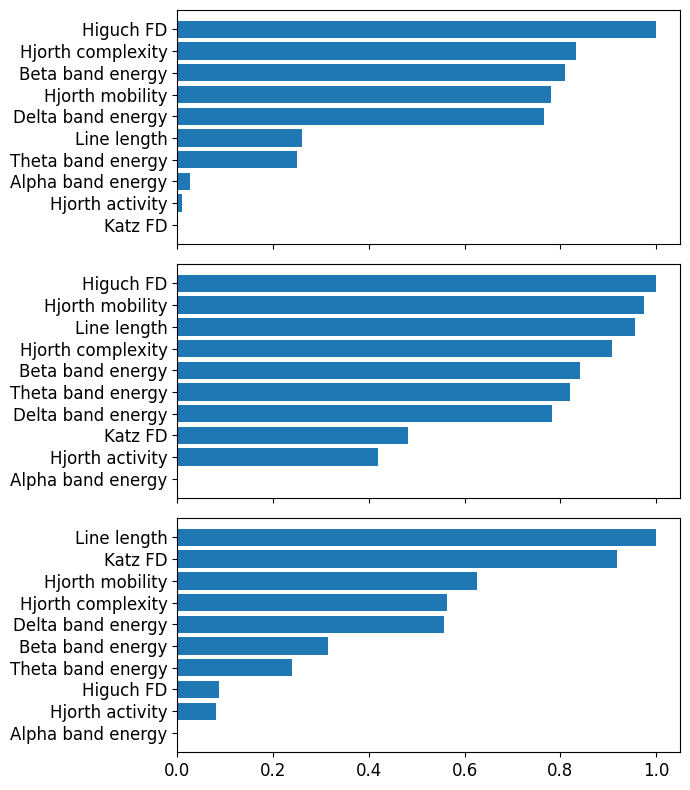

In [21]:
### ISBI ###
feature_labels = np.array(['Hjorth activity', 'Hjorth mobility','Hjorth complexity',
                "Line length", "Katz FD", "Higuch FD", "Delta band energy",
                "Theta band energy", "Alpha band energy", "Beta band energy"
                ])
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 8),sharex=True)
show_importances(interictal_importances, feature_labels, axes[0])
show_importances(preictal_importances, feature_labels, axes[1])
show_importances(ictal_importances, feature_labels, axes[2])
plt.tight_layout()  # To avoid label cutoffs

fig.savefig("/home/szymon/code/sano/sano_eeg/plots/feature_importance_isbi.pdf",dpi=400)
plt.show()

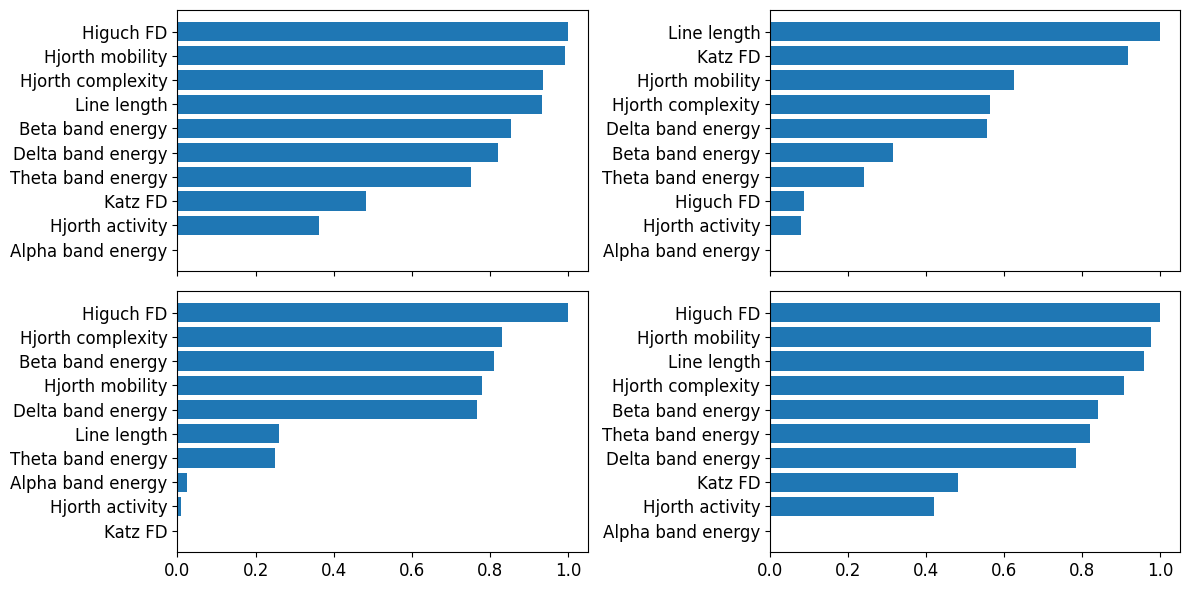

In [6]:
feature_labels = np.array(['Hjorth activity', 'Hjorth mobility','Hjorth complexity',
                "Line length", "Katz FD", "Higuch FD", "Delta band energy",
                "Theta band energy", "Alpha band energy", "Beta band energy"
                ])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6),sharex=True)
show_importances(sum_importances, feature_labels, axes[0, 0])
show_importances(ictal_importances, feature_labels, axes[0, 1])
show_importances(interictal_importances, feature_labels, axes[1, 0])
show_importances(preictal_importances, feature_labels, axes[1, 1])
plt.tight_layout()  # To avoid label cutoffs
# fig.savefig("/home/szymon/code/sano/sano_eeg/plots/feature_importance.pdf",dpi=400)
plt.show()

In [ ]:
sum_explanation =  dummy_explanation.clone()
sum_explanation.node_mask = sum_masks
ictal_explanation = dummy_explanation.clone()
ictal_explanation.node_mask = ictal_masks
interictal_explanation = dummy_explanation.clone()
interictal_explanation.node_mask = interictal_masks
preictal_explanation = dummy_explanation.clone()
preictal_explanation.node_mask = preictal_masks


# Attention scores

In [1]:
import os
import torch
import torch_geometric
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import json
import matplotlib

In [3]:
result_dir = "../explainability_results/attention_connectivity_new"
try:
    del sum_masks_att
except NameError:
    print("No sum masks")
try:
    del ictal_masks_att
except NameError:
    print("No ictal masks")
try:
    del interictal_masks_att
except NameError:
    print("No interictal masks")
try:
    del preictal_masks_att
except NameError:
    print("No preictal masks")
for n, fold_folder in enumerate(os.listdir(result_dir)):
    explanation_filenames_att = [os.path.join(result_dir, fold_folder, f) for f in os.listdir(os.path.join(result_dir, fold_folder)) if f.endswith(".json")]
    explanation_filenames_att.sort()
    for explanation_filename in explanation_filenames_att:
        explanation = json.loads(open(explanation_filename).read())
        explanation = {eval(k): v for k, v in explanation.items()}
        keyword = os.path.basename(explanation_filename).split('_')[-1].split('.')[0]
        if keyword == "all":
            if n == 0:
                print("Creating sum masks")
                sum_masks_att = explanation
            else:
                for edge in explanation.keys():
                    if edge in sum_masks_att.keys():
                        sum_masks_att[edge] += explanation[edge]
                    else:
                        sum_masks_att[edge] = explanation[edge]
        elif keyword == "ictal":
            if n == 0:
                print("Creating ictal masks")
                ictal_masks_att = explanation
            else:
                for edge in explanation.keys():
                    if edge in ictal_masks_att.keys():
                        ictal_masks_att[edge] += explanation[edge]
                    else:
                        ictal_masks_att[edge] = explanation[edge]
        elif keyword == "interictal":
            if n == 0:
                print("Creating interictal masks")
                interictal_masks_att = explanation
            else:
                for edge in explanation.keys():
                    if edge in interictal_masks_att.keys():
                        interictal_masks_att[edge] += explanation[edge]
                    else:
                        interictal_masks_att[edge] = explanation[edge]
        elif keyword == "preictal":
            if n == 0:
                print("Creating preictal masks")
                preictal_masks_att = explanation
            else:
                for edge in explanation.keys():
                    if edge in preictal_masks_att.keys():
                        preictal_masks_att[edge] += explanation[edge]
                    else:
                        preictal_masks_att[edge] = explanation[edge]
fold_number = len(os.listdir(result_dir))
sum_masks_att = {k: v/fold_number for k, v in sum_masks_att.items()}
ictal_masks_att = {k: v/fold_number for k, v in ictal_masks_att.items()}
interictal_masks_att = {k: v/fold_number for k, v in interictal_masks_att.items()}
preictal_masks_att = {k: v/fold_number for k, v in preictal_masks_att.items()}

# masks_list = [sum_masks_att, ictal_masks_att, interictal_masks_att, preictal_masks_att]
### ISBI version with no summed_masks ###
masks_list = [interictal_masks_att,preictal_masks_att,ictal_masks_att]

No sum masks
No ictal masks
No interictal masks
No preictal masks
Creating sum masks
Creating ictal masks
Creating interictal masks
Creating preictal masks


In [4]:
def create_graph_from_dict(input_dict, self_loops=False, threshold=0.0):
    g = nx.Graph()
    nodes = np.arange(18)
    g.add_nodes_from(nodes)
    for edge, value in input_dict.items():
        if value < threshold:
            continue
        if self_loops:
            g.add_edge(*edge, strength=value)
        else:
            if edge[0] != edge[1]:
                g.add_edge(*edge, strength=value)
    return g

In [13]:
ch_names = [
    "Fp1",
    "Fp2",
    "F7",
    "F3",
    "Fz",
    "F4",
    "F8",
    "T7",
    "C3",
    "Cz",
    "C4",
    "T8",
    "P7",
    "P3",
    "P4",
    "P8",
    "O1",
    "O2",
]
ch_dict = {ch_name: idx for idx, ch_name in enumerate(ch_names)}

ch_names_2 = [
    "T8",
    "C4",
    "F8",
    "F4",
    "Fp2",
    "Fz",
    "Fp1",
    "F3",
    "F7",
    "C3",
    "T7",
    "P7",
    "P3",
    "O1",
    "Cz",
    "O2",
    "P4",
    "P8",
]
ch_dict_2 = {ch_name: ch_dict[ch_name] for ch_name in ch_names_2}


In [6]:
def reverse_dict(d):
    return {v: k for k, v in d.items()}

In [8]:
ch_dict_2 = reverse_dict(ch_dict_2)
ch_dict = reverse_dict(ch_dict)
dict_values = reverse_dict(dict(zip(ch_dict.keys(), ch_dict_2.keys())))


In [ ]:
%matplotlib inline

/tmp/ipykernel_13926/328810876.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


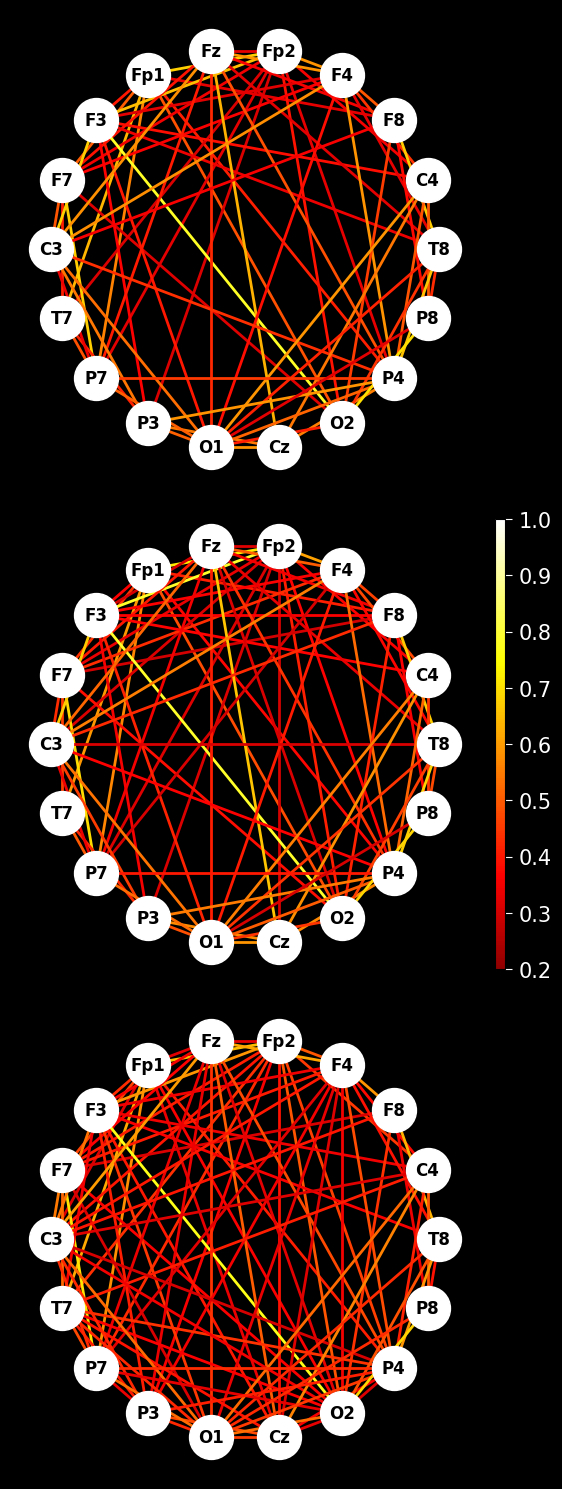

In [14]:
ch_names = [
    "Fp1",
    "Fp2",
    "F7",
    "F3",
    "Fz",
    "F4",
    "F8",
    "T7",
    "C3",
    "Cz",
    "C4",
    "T8",
    "P7",
    "P3",
    "P4",
    "P8",
    "O1",
    "O2",
]
# ch_names = [
#     "T8",
#     "C4",
#     "F8",
#     "F4",
#     "Fp2",
#     "Fp1",
#     "F3",
#     "F7",
#     "C3",
#     "T7",
#     "P7",
#     "P3",
#     "O1",
#     "Cz",
#     "Fz",
#     "O2",
#     "P4",
#     "P8",
# ]
custom_labels = {n : ch_names[n] for n in range(len(ch_names))}
fig, axes = plt.subplots(ncols=1,nrows=3,figsize=(5, 15))
axes = axes.ravel()
cmap = plt.cm.hot
for n,dict_att in enumerate(masks_list):
    torch_geometric.seed_everything(42)
    g = create_graph_from_dict(dict_att, threshold=0.3)
    edge_opacities = [
        strength
        for strength in nx.get_edge_attributes(g, "strength").values()
    ]
    pos_circular = nx.circular_layout(g)
    pos_custom = {n : pos_circular[dict_values[n]] for n in range(len(ch_names))}
    nx.draw(
        g,
        with_labels=True,
        labels=custom_labels,
        pos=pos_custom,
        font_weight="bold",
        edge_color=edge_opacities,
        width=2,
        node_size=1000,
        node_color="white",
        edge_cmap=cmap,
        ax=axes[n],
        edge_vmin=0,
        edge_vmax=1,
    )
    
cax = fig.add_axes([1., 0.35, 0.02, 0.3])
norm = matplotlib.colors.Normalize(vmin=0.2, vmax=1)
colorbar = fig.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),cax=cax,
)
color = "white"
# colorbar.set_label(label="Connection Strength", color=color, size=15)
colorbar.ax.set_ylim([0.2,1])
colorbar.ax.yaxis.set_tick_params(color=color, labelcolor=color, size=5, labelrotation=00)
colorbar.ax.tick_params(axis='y', which='major', pad=5, labelsize=15)
fig = plt.gcf()
fig.set_facecolor("black")  # Set the background color here
plt.tight_layout()
plt.savefig("/home/szymon/code/sano/sano_eeg/plots/conncectivity_isbi.pdf",dpi=400)
plt.show()

In [ ]:
pos_circular

In [ ]:
pairs_list = []
for pair in dict_values.items():
    pairs_list.append(pair)
pairs_list

In [ ]:
for node1, node2 in pairs_list:
    if node1 in pos_circular and node2 in pos_circular:
        pos_circular[node1], pos_circular[node2] = pos_circular[node2], pos_circular[node1]


In [ ]:
pos_circular

In [ ]:
nx.draw_networkx_nodes(g, pos_custom)
nx.draw_networkx_labels(g, pos_custom, labels=ch_dict_2, font_size=10)

In [ ]:
import mne

In [ ]:
mne_raw = mne.io.read_raw_edf("/home/szymon/code/sano/sano_eeg/data/preprocessed_data_full/chb01/chb01_01.edf")

In [ ]:
montage = mne.channels.read_custom_montage("/home/szymon/code/sano/sano_eeg/data/chb_mit_ch_locs.loc")

# Extending ICAISC findings

In [ ]:
import os
import wandb
from statistics import mean, stdev
import time

In [ ]:
api_key_txt = open("/home/szymon/code/sano/sano_eeg/wandb_api_key.txt", "r")
api_key = api_key_txt.read()
api_key_txt.close()
os.environ["WANDB_API_KEY"] = api_key
api = wandb.Api()

In [ ]:
mapping_dict_preprocessing = {
    "None": "no_preprocessing",
    "Filtering and re-reference": "filtering_avg_ref_only",
    "Our protocol": "full_preprocessing"}

In [ ]:
preprocessing_dict = {}
for key in mapping_dict_preprocessing.keys():
    auroc_list = []
    run_name = mapping_dict_preprocessing[key]
    for run in api.runs('mazurek/sano_eeg',filters={"group":run_name}):
        auroc = run.__dict__['_attrs']['summaryMetrics']['loso_AUROC']
        auroc_list.append(auroc)
    preprocessing_dict[key] = [round(mean(auroc_list),4),round(stdev(auroc_list),4)]

In [ ]:
preprocessing_dict

In [ ]:
mapping_dict_balancing = {
    'Undersampling': "no_overlap_undersampling",
    'Window overlap (ictal samples only)': "overlap_ictal_only",
    'Window overlap (all samples)': "overlap_only",
    'Window overlap (all samples) + undersampling': "overlap_undersampling",
    'Positive class weight': "class_weights_only",
    'Window overlap (ictal samples only) + positive class weight': "overlap_ictal_class_weights",
    'Window overlap (all samples) + positive class weight': "class_weights_overlap",
    'Window overlap (all samples) + SMOTE (training set and LOO patient)': "smote_train_full_ds",
    'Window overlap (all samples) + SMOTE (training set)': "smote_train_only_no_class_weights",
    'Window overlap (all samples) + SMOTE (LOO patient)': "smote_loso_only_no_weights",
    'Window overlap (all samples) + SMOTE (LOO patient) + positive class weight': "smote_loso_only_weights",
}


In [ ]:
balancing_dict = {}
for key in mapping_dict_balancing.keys():
    auroc_list = []
    run_name = mapping_dict_balancing[key]
    for run in api.runs('mazurek/sano_eeg',filters={"group":run_name}):
        try:
            auroc = run.__dict__['_attrs']['summaryMetrics']['loso_AUROC']
            auroc_list.append(auroc)
        except KeyError:
            print(f"KeyError in  {run.name} {run.group}")
            auroc_list.append(0.9019) #manually inptuted value, idk why it cannot read it from wandb
    try:
        balancing_dict[key] = [round(mean(auroc_list),4),round(stdev(auroc_list),4)]
    except:
        print(f"Error in {key}")

# MNE filtering

In [ ]:
import mne
import matplotlib.pyplot as plt
from utils.utils import load_and_dump_channels,reorder_channels_chbmit
import numpy as np

In [ ]:
%matplotlib qt

In [ ]:
### RAW FILES ###
# npy_data = 
raw = load_and_dump_channels("/home/szymon/code/sano/sano_eeg/data/raw_dataset/chb01/chb01_03.edf")
reorder_channels_chbmit(raw)
raw.load_data()
npy_data = np.load("/home/szymon/code/sano/sano_eeg/data/npy_data_no_pc_0_5_30_avg_ref/chb01_03.npy")
raw._data = npy_data
raw.plot(duration=6)


In [ ]:
### PROCESSED FILES ###
path = '/home/szymon/code/sano/sano_eeg/src/preprocessing/results/chb01/chb01_01.edf'
raw_processed = mne.io.read_raw_edf(path, preload=True)
raw_processed.plot()

# Signal plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

In [ ]:
signal = np.load("/home/szymon/code/sano/sano_eeg/data/npy_data_full/chb01/chb01_01.npy")
signal = signal[:,:600]

In [ ]:
signal_raw = mne.io.read_raw_edf("/home/szymon/code/sano/sano_eeg/data/raw_dataset/chb01/chb01_01.edf", preload=True)
signal_raw_array = signal_raw.get_data()[:,200:600]


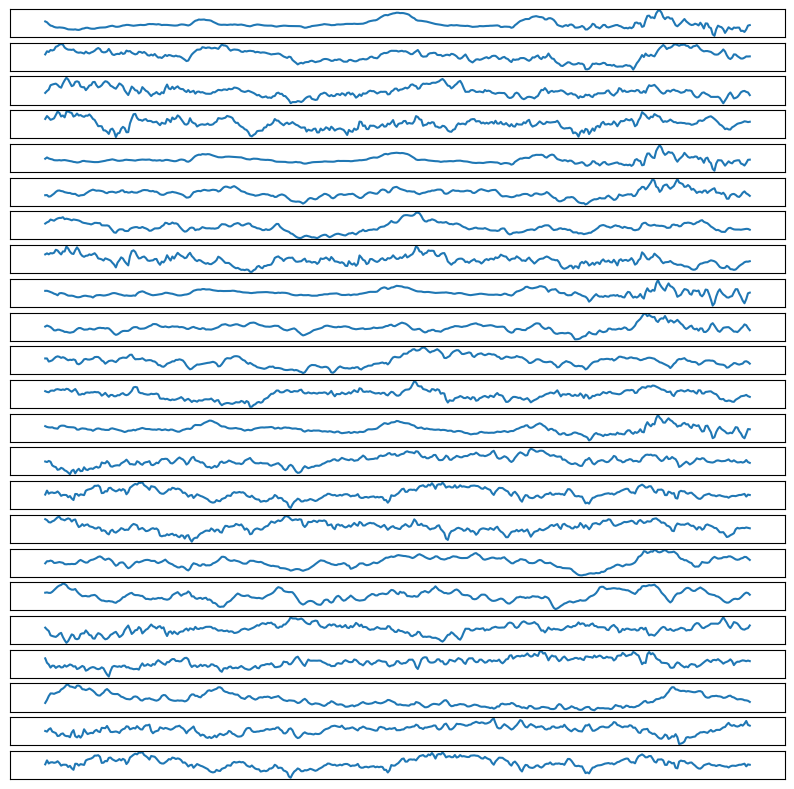

In [41]:
fig, ax = plt.subplots(nrows=23, ncols=1, figsize=(10, 10))
for n, sig in enumerate(signal_raw_array):
    ax[n].plot(sig)
    ax[n].set_yticks([])
    ax[n].set_xticks([])
plt.show()

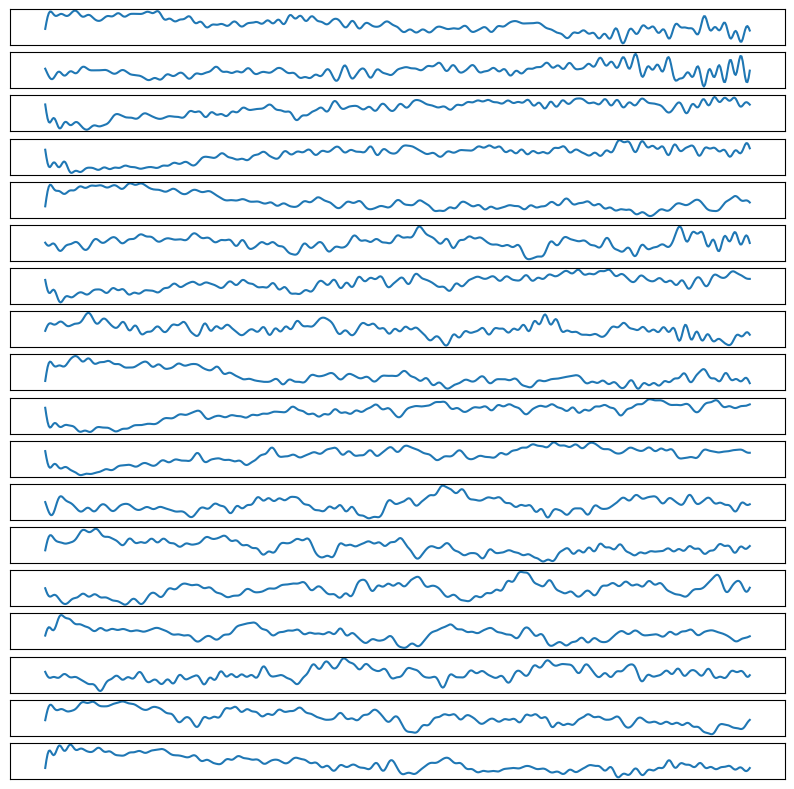

In [42]:
fig, ax  = plt.subplots(nrows=18,ncols=1,figsize=(10, 10))
for n,sig in enumerate(signal):
    ax[n].plot(sig)
    ax[n].set_yticks([])
    ax[n].set_xticks([])
plt.show()